In [1]:
import numpy as np

def fft_recursive(x):
    """
    x: Input array (1D) berupa bilangan kompleks atau real
    """
    N = len(x)
    
    # 1. Base Case: Jika N=1, return x
    if N <= 1:
        return x
    
    #Pisah Genap dan Ganjil
    even = fft_recursive(x[0::2])
    odd  = fft_recursive(x[1::2])
    
    k = np.arange(N // 2)
    T = np.exp(-2j* np.pi * k / N) * odd
    
    return np.concatenate([even + T, even - T])



In [2]:
def inverse_fft_recursive(x):
    N = len(x)
    if N<=1:
        return x
    
    even = inverse_fft_recursive(x[0::2])
    odd = inverse_fft_recursive(x[1::2])

    k = np.arange(N//2)
    T = np.exp(2j*np.pi * k / N) *odd

    return np.concatenate([even+T,even-T])

In [3]:
def inverse_fft(x):
    ans = inverse_fft_recursive(x)
    ans = ans/(len(x))
    return ans

In [4]:
def multiplypolinoms(p1,p2):
    # p1 and p2 contains array of coefficients
    target_length = len(p1) + len(p2) -1

    n = 1
    while(n < target_length) :
        n*=2
    new_p1 = np.zeros(n)
    new_p2 = np.zeros(n)

    new_p1[:len(p1)] = p1
    new_p2[:len(p2)] = p2

    # 1. Convert to list of value DFT
    fft_p1 = fft_recursive(new_p1)
    fft_p2 = fft_recursive(new_p2)
    multiple = fft_p1 * fft_p2
    # for i in range (len(p1)):
    #     multiple[i] = fft_p1[i] * fft_p2[i]
    coeff = inverse_fft(multiple)
    coeff = coeff[:n-1]
    return coeff

In [28]:
a = np.random.randint(300,size = int(3000))
b = np.random.randint(300,size = int(3000))

In [29]:
def manual_multiply_polinoms(p1,p2):
    n = len(p1) + len(p2) -1
    res = np.zeros(n)
    for i in range(len(p1)) :
        for j in range(len(p2)) :
            res[i+j] += p1[i] * p2[j]
    
    return res

In [30]:
a,b

(array([116, 290,  42, ..., 214,  54, 278], shape=(3000,), dtype=int32),
 array([109, 117, 274, ..., 127,  87, 176], shape=(3000,), dtype=int32))

In [31]:
import time

In [32]:
start_time_fft = time.time()
fft_style = multiplypolinoms(a,b)
end_time = time.time() - start_time_fft
print(f"FFT Time : {end_time:.4f}s")

FFT Time : 0.4108s


In [33]:
start_time_manual = time.time()
manual_style = manual_multiply_polinoms(a,b)
end_time_manual = time.time() - start_time_manual
print(f"Manual Time : {end_time_manual:.4f}s")

Manual Time : 5.0434s


Testing polynomial multiplication with different N values.
Size:   100 | FFT: 0.012110s | Manual: 0.005074s | Speedup: 0.42x
Size:   500 | FFT: 0.056657s | Manual: 0.170887s | Speedup: 3.02x
Size:  1000 | FFT: 0.104293s | Manual: 0.603404s | Speedup: 5.79x
Size:  2000 | FFT: 0.205832s | Manual: 2.401206s | Speedup: 11.67x
Size:  3000 | FFT: 0.421430s | Manual: 5.287874s | Speedup: 12.55x
Size:  5000 | FFT: 0.762412s | Manual: 15.519466s | Speedup: 20.36x


C:\Users\LOQ\AppData\Local\Temp\ipykernel_12028\3207667232.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(fontsize=10)


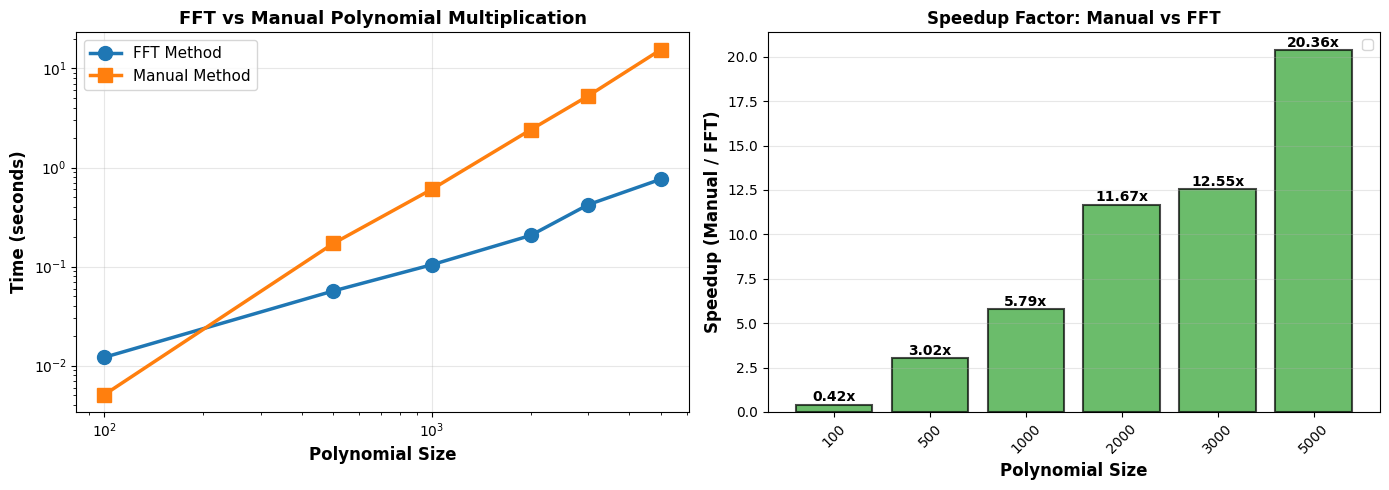


SUMMARY:
Average FFT time: 0.260456s
Average Manual time: 3.997985s
Average Speedup: 8.96x


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import time
from FastFourierTransform import multiplypolinoms

# Generate berbagai ukuran polynomial
sizes = [100, 500, 1000, 2000, 3000, 5000]
fft_times = []
manual_times = []

print("Testing polynomial multiplication with different N values.")

for size in sizes:
    p1 = np.random.randint(1, 300, size=size)
    p2 = np.random.randint(1, 300, size=size)
    
    # Test FFT method
    start = time.time()
    result_fft = multiplypolinoms(p1, p2)
    fft_time = time.time() - start
    fft_times.append(fft_time)
    
    # Test Manual method
    start = time.time()
    result_manual = manual_multiply_polinoms(p1, p2)
    manual_time = time.time() - start
    manual_times.append(manual_time)
    
    print(f"Size: {size:5d} | FFT: {fft_time:.6f}s | Manual: {manual_time:.6f}s | Speedup: {manual_time/fft_time:.2f}x")


# VISUALISASI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Line chart
axes[0].plot(sizes, fft_times, 'o-', linewidth=2.5, markersize=10, label='FFT Method', color='#1f77b4')
axes[0].plot(sizes, manual_times, 's-', linewidth=2.5, markersize=10, label='Manual Method', color='#ff7f0e')
axes[0].set_xlabel('Polynomial Size', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
axes[0].set_title('FFT vs Manual Polynomial Multiplication', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)
axes[0].set_yscale('log')
axes[0].set_xscale('log')

# Plot 2: Speedup chart
speedup = [manual_times[i] / fft_times[i] for i in range(len(sizes))]
axes[1].bar(range(len(sizes)), speedup, color='#2ca02c', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Polynomial Size', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Speedup (Manual / FFT)', fontsize=12, fontweight='bold')
axes[1].set_title('Speedup Factor: Manual vs FFT', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(len(sizes)))
axes[1].set_xticklabels([f'{s}' for s in sizes], rotation=45)
axes[1].grid(alpha=0.3, axis='y')
axes[1].legend(fontsize=10)

# Add value labels on bars
for i, v in enumerate(speedup):
    axes[1].text(i, v + 0.2, f'{v:.2f}x', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Summary
print("\nSUMMARY:")
print(f"Average FFT time: {np.mean(fft_times):.6f}s")
print(f"Average Manual time: {np.mean(manual_times):.6f}s")
print(f"Average Speedup: {np.mean(speedup):.2f}x")

In [14]:
fft_style

array([ 60227.        -1.76047479e-08j,  50322.00000001-1.66067918e-08j,
        39698.        -1.71600666e-08j, ...,
       134565.        -7.23521135e-10j,  66362.        -5.20774250e-09j,
        62965.        -2.82760164e-09j], shape=(4095,))

In [15]:
manual_style

array([ 60227.        -1.76047479e-08j,  50322.00000001-1.66067918e-08j,
        39698.        -1.71600666e-08j, ...,
       134565.        -7.23521135e-10j,  66362.        -5.20774250e-09j,
        62965.        -2.82760164e-09j], shape=(4095,))